### Import libraries needed

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go
from plotly.offline import iplot
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from plotly.offline import iplot

### Reading data into a DataFrame

In [4]:
df = pd.read_csv('HappinessData.csv', sep=',')
df.head()

,country,score,gdp_per_capita,healthy_life_expectancy,social_support,freedom_to_make_life_choices,generosity,corruption_perception,year
0,Switzerland,7.587,1.39651,0.94143,1.34951,0.66557,0.29678,0.41978,2015
1,Iceland,7.561,1.30232,0.94784,1.40223,0.62877,0.43630,0.14145,2015
2,Denmark,7.527,1.32548,0.87464,1.36058,0.64938,0.34139,0.48357,2015
3,Norway,7.522,1.45900,0.88521,1.33095,0.66973,0.34699,0.36503,2015
4,Canada,7.427,1.32629,0.90563,1.32261,0.63297,0.45811,0.32957,2015


### Getting information about metrics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       935 non-null    object 
 1   score                         935 non-null    float64
 2   gdp_per_capita                935 non-null    float64
 3   healthy_life_expectancy       935 non-null    float64
 4   social_support                935 non-null    float64
 5   freedom_to_make_life_choices  935 non-null    float64
 6   generosity                    935 non-null    float64
 7   corruption_perception         934 non-null    float64
 8   year                          935 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 62.2+ KB


### Check for missings

In [6]:
df.isnull().sum()

country                         0
score                           0
gdp_per_capita                  0
healthy_life_expectancy         0
social_support                  0
freedom_to_make_life_choices    0
generosity                      0
corruption_perception           1
year                            0
dtype: int64

### Imputation of missings with column mean

In [7]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df['corruption_perception'] = imp_mean.fit_transform(df[['corruption_perception']])
df.isnull().sum()

country                         0
score                           0
gdp_per_capita                  0
healthy_life_expectancy         0
social_support                  0
freedom_to_make_life_choices    0
generosity                      0
corruption_perception           0
year                            0
dtype: int64

In [9]:
# forming a set of numeric data
cont_df = df.drop(columns=['year']).select_dtypes(include='number')

### Visualization of the values of happiness score on the world map

In [11]:
data = dict(type = 'choropleth', 
           locations = df['country'],
           locationmode = 'country names',
           colorscale='YlGnBu',
           z = df['score'], 
           text = df['country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

### Visualization of the values of the happiness score of 10 lagging countries

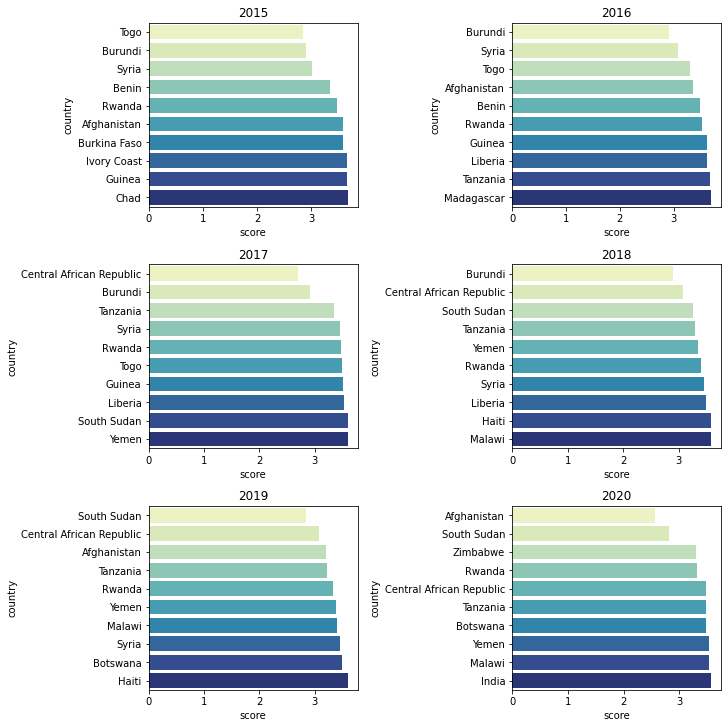

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(10,10))
year = 2014
for row in range(3):
    for col in range(2):
        year += 1
        ddata = df.loc[df['year']==year].sort_values(by=['score'], ascending=True).head(10)
        sns.barplot(x='score', y='country', data=ddata, orient='h', order=ddata['country'], ax=axes[row, col], palette='YlGnBu').set_title(year)

### Visualization of the values of the happiness score of 10 leading countries

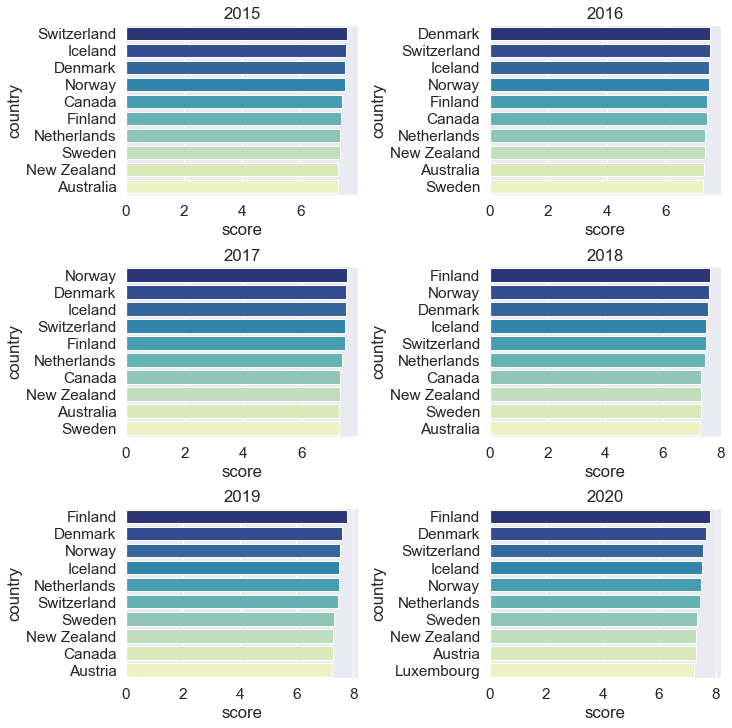

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(10,10))
year = 2014
for row in range(3):
    for col in range(2):
        year += 1
        ddata = df.loc[df['year']==year].sort_values(by=['score'], ascending=False).head(10)
        sns.barplot(x='score', y='country', data=ddata, orient='h', ax=axes[row, col], palette='YlGnBu_r').set_title(year)

### Visualization of the dynamics of the happiness score of 10 leading countries

10 ['Finland', 'Denmark', 'Norway', 'Switzerland', 'Iceland', 'Netherlands', 'Canada', 'Sweden', 'New Zealand', 'Australia']


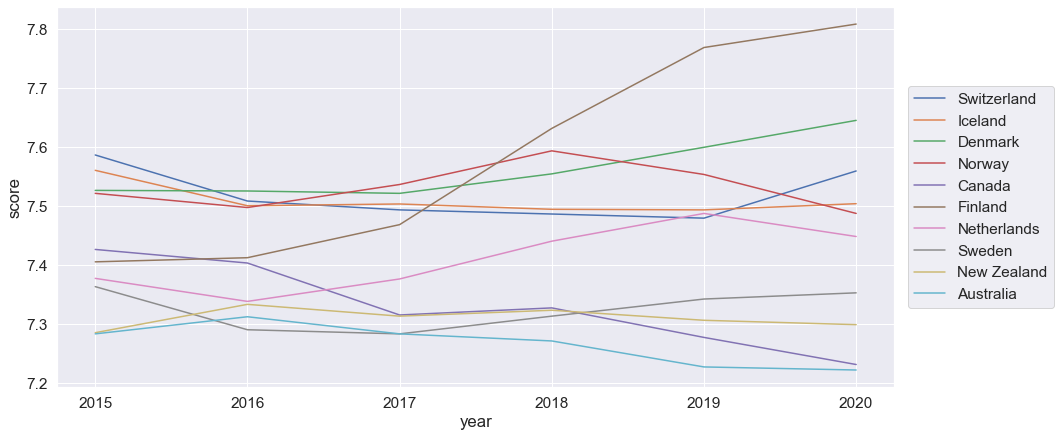

In [15]:
plt.subplots(figsize=(15,7))
sortasc_uniq = df.sort_values(by=['score'], ascending=True)
sortdesc_uniq = df.sort_values(by=['score'], ascending=False)
countries = []
countries.extend(list(sortdesc_uniq['country'].drop_duplicates().head(10)))
print(len(countries), countries)
upmean = df[df['country'].isin(countries)]
sns.lineplot(data=upmean, x='year', y='score', hue='country')
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)

### Ploting average happiness

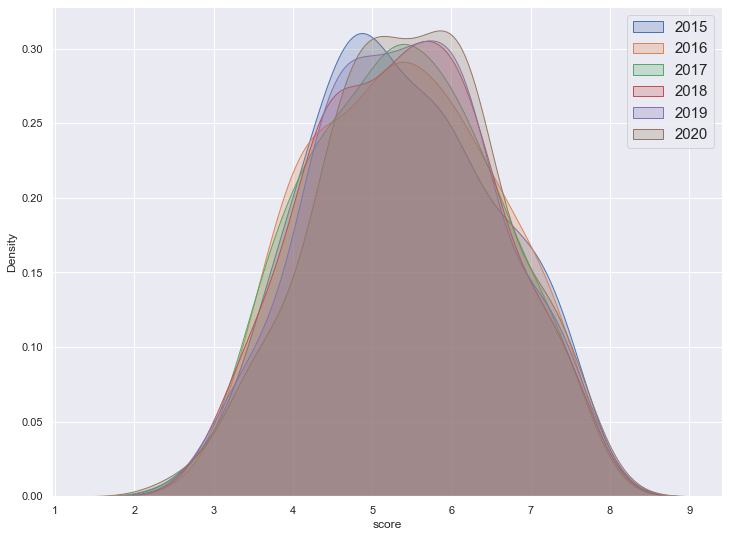

In [12]:
sns.set(rc={'figure.figsize':(12,9)})
for i in range(2015, 2021):
    sns.kdeplot(data = df['score'].loc[df['year'] == i], shade = True, label = str(i))
plt.legend(fontsize=15)

### Visualizing correlation using a heatmap

Text(0.5, 1.0, 'ALL')

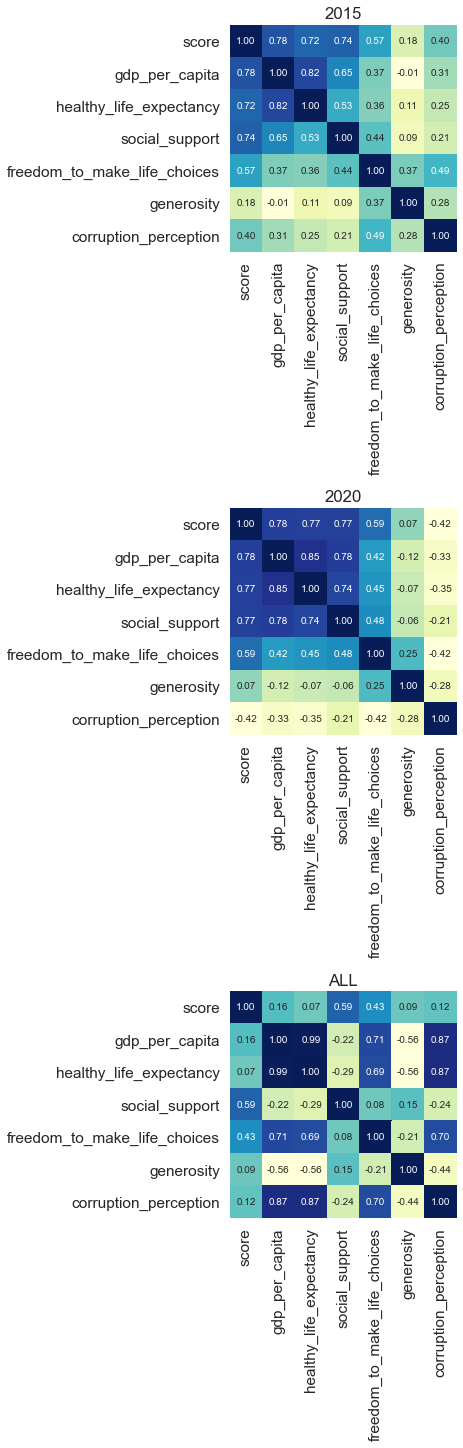

In [18]:
# creating a shape and a grid for placing graphs
fig, axes = plt.subplots(nrows=3, ncols=1, constrained_layout=True, figsize=(20,20))
# building a heat map for 2015
sns.heatmap(cont_df.loc[df['year']==2015].corr(), # the visualized data is the correlation between the parameters
            cbar=False, # palette display
            annot=True, # displaying correlation values in matrix cells
            annot_kws={'size': 10}, # defining the font size of text in cells
            square=True, # cells are square
            fmt='.2f', # numbers in cells are written with two-digit precision
            cmap='YlGnBu',# determination of cell color
            ax=axes[0]).set_title('2015')
# building a heatmap for 2020
sns.heatmap(cont_df.loc[df['year']==2020].corr(), cbar=False, annot=True,
            annot_kws={'size': 10}, square=True, fmt='.2f', cmap='YlGnBu',
            ax=axes[1]).set_title('2020')

# building a heat map for all years
sns.heatmap(cont_df.corr(), cbar=False, annot=True, annot_kws={'size': 10},
            square=True, fmt='.2f', cmap='YlGnBu', ax=axes[2]).set_title('ALL')

### Visualization of the distribution of indicator values

<AxesSubplot:xlabel='year', ylabel='social_support'>

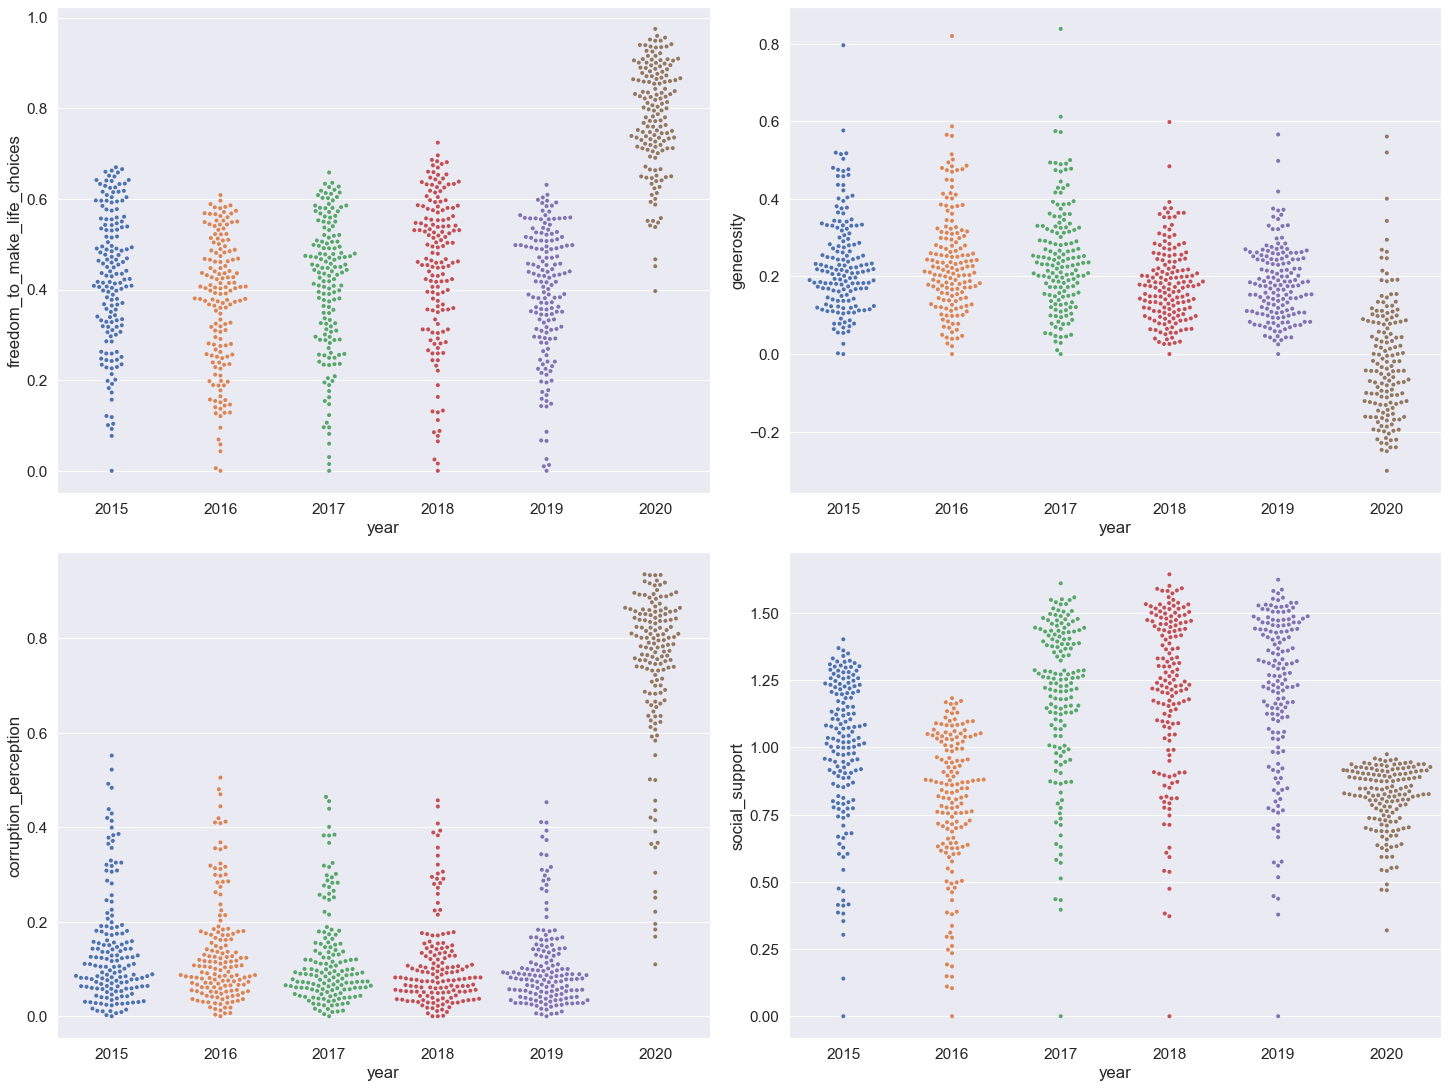

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(20,15))
sns.set(font_scale=1.4)
sns.swarmplot(x=df['year'], y=df['freedom_to_make_life_choices'], ax=axes[0,0], size=4)
sns.swarmplot(x=df['year'], y=df['generosity'], ax=axes[0,1], size=4)
sns.swarmplot(x=df['year'], y=df['corruption_perception'], ax=axes[1,0], size=4)
sns.swarmplot(x=df['year'], y=df['social_support'], ax=axes[1,1], size=4)

### Visualization of the dynamics of coefficient values for Finland

In [16]:
# forming a dataset of indicator values for Finland
parameters = df[df.columns[1:8]].loc[df['country']=='Finland']
# data normalization
norm_scale = preprocessing.MinMaxScaler().fit(parameters)
parameters_norm = pd.DataFrame(norm_scale.transform(parameters))
parameters_norm

,0,1,2,3,4,5,6
0,0.000000,0.000000,0.001125,0.570719,0.186839,0.931902,1.000000
1,0.017383,0.012379,0.000025,0.282764,0.000000,1.000000,0.983141
2,0.156444,0.016400,0.000000,0.918840,0.124059,0.969984,0.857481
3,0.561212,0.001578,0.000912,1.000000,0.290798,0.831680,0.905074
4,0.901415,0.005321,0.002488,0.992159,0.066009,0.675829,0.905074
5,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000


In [19]:
# forming a dataset for visualization
new_df = pd.DataFrame(columns=['year', 'parameter', 'value'])
params = list(df.columns[1:8])
for i in parameters_norm.columns:
    year = df['year'].min()
    for j in range(len(parameters_norm)):
        new_df.loc[len(new_df)] = [year, params[i], parameters_norm[i][j]]
        year += 1
new_df

,year,parameter,value
0,2015,score,0.000000
1,2016,score,0.017383
2,2017,score,0.156444
3,2018,score,0.561212
4,2019,score,0.901415
5,2020,score,1.000000
6,2015,gdp_per_capita,0.000000
7,2016,gdp_per_capita,0.012379
8,2017,gdp_per_capita,0.016400
9,2018,gdp_per_capita,0.001578


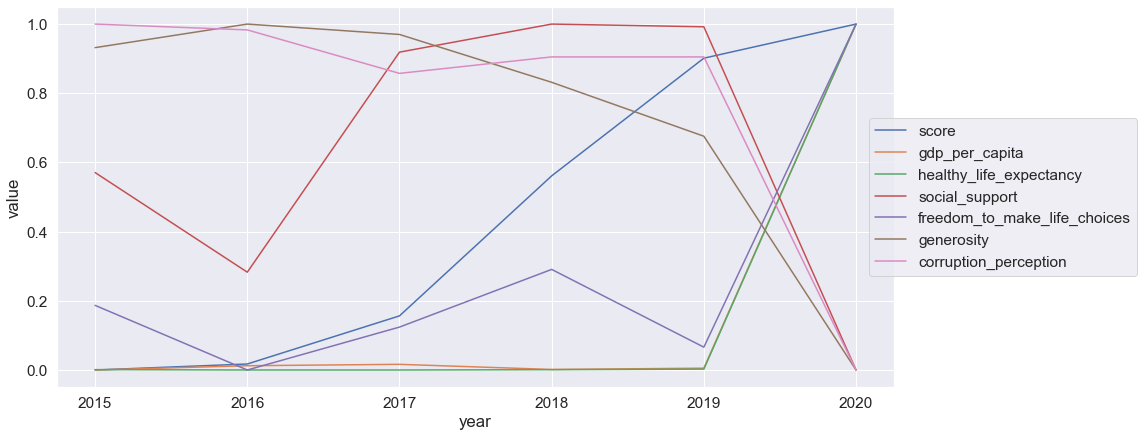

In [20]:
# visualization of data from the generated dataset
plt.subplots(figsize=(15,7))
sns.lineplot(data=new_df, x='year', y='value', hue='parameter')
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)